First quantum Program

In [3]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,[1,2])
qc.measure_all()


In [6]:
IBMQ.save_account(token="3814b9e43e48f68d5b032a2391b3852f57500e2903cde985686e2ad60c5a97773f6af550832a2c3dcec5b99325a8e80c9437e55e4d25335d58baa82c1408b86a")
IBMQ.load_account()
from qiskit.providers.ibmq import IBMQ, least_busy 
provider = IBMQ.get_provider('ibm-q')
device = least_busy(provider.backends(filters = lambda x: not x.configuration().simulator))
print(f'Running on {device.name()}')

configrc.store_credentials:WARNING:2022-10-20 15:08:00,478: Credentials already present. Set overwrite=True to overwrite.


Running on ibmq_belem


In [7]:
from qiskit import transpile
transpiled_qc = transpile(qc,device)

In [8]:
from qiskit.tools import job_monitor
job = device.run(transpiled_qc)
job_monitor(job)

Job Status: job has successfully run


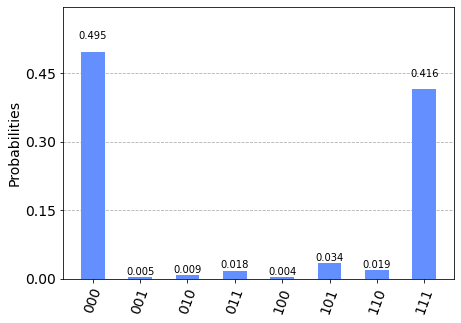

In [9]:
from qiskit.visualization import plot_histogram
plot_histogram(job.result().get_counts())